In [ ]:
!unzip glove.6B.zip -d my_data


unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB


In [2]:
max_len = 50
embedding_dim = 100

In [7]:
sns.set_theme(style="whitegrid")
df = pd.read_csv("train.csv").sample(frac=1, random_state=42)
test = pd.read_csv("test.csv")

In [8]:
df.drop(columns=['id', 'tid1', 'tid2'], inplace=True)

In [9]:
df.head()

,title1_en,title2_en,label
104355,Homemade rat poison. One dead litter.,"Homemade rat poison, one dead, one dead, all k...",agreed
133170,"By eating these five kinds of vegetables, you ...","Zhang DaDa ""day"" upside down begging for growt...",unrelated
221087,The Shenzhen Nailed Nailed Households Resume $...,Chengdu homebuyers can't buy a house with half...,unrelated
135365,"Wu Jing may face a compensation of 1 billion, ...","With billions of dollars in compensation, Wuji...",agreed
170183,"Yin Xiangjie out of prison, invited Mandar to ...",is xu qing 's current husband a gao bo? the fa...,unrelated


In [10]:
train = df

In [11]:
train.head()

,title1_en,title2_en,label
104355,Homemade rat poison. One dead litter.,"Homemade rat poison, one dead, one dead, all k...",agreed
133170,"By eating these five kinds of vegetables, you ...","Zhang DaDa ""day"" upside down begging for growt...",unrelated
221087,The Shenzhen Nailed Nailed Households Resume $...,Chengdu homebuyers can't buy a house with half...,unrelated
135365,"Wu Jing may face a compensation of 1 billion, ...","With billions of dollars in compensation, Wuji...",agreed
170183,"Yin Xiangjie out of prison, invited Mandar to ...",is xu qing 's current husband a gao bo? the fa...,unrelated


In [12]:
train.label.value_counts(), df.label.value_counts()

(unrelated    175598
 agreed        74238
 disagreed      6606
 Name: label, dtype: int64,
 unrelated    175598
 agreed        74238
 disagreed      6606
 Name: label, dtype: int64)

In [13]:
len(train)

256442

In [14]:
df.head()

,title1_en,title2_en,label
104355,Homemade rat poison. One dead litter.,"Homemade rat poison, one dead, one dead, all k...",agreed
133170,"By eating these five kinds of vegetables, you ...","Zhang DaDa ""day"" upside down begging for growt...",unrelated
221087,The Shenzhen Nailed Nailed Households Resume $...,Chengdu homebuyers can't buy a house with half...,unrelated
135365,"Wu Jing may face a compensation of 1 billion, ...","With billions of dollars in compensation, Wuji...",agreed
170183,"Yin Xiangjie out of prison, invited Mandar to ...",is xu qing 's current husband a gao bo? the fa...,unrelated


In [15]:
test.head()

,id,tid1,tid2,title1_en,title2_en
0,256442,100672,100673,"The great coat brother Zhu Zhu Wen, in the man...","Lin xinsheng after the birth of ""hard milking,..."
1,256443,162269,162270,NASA reveals facts about UFO wreckage found on...,"The UFO found in Yuancun, Jiaocheng County, Sh..."
2,256444,157826,157854,The hollow tomatoes are loaded with hormones.,"Li chenfan bingbing home photos, netizen: this..."
3,256445,109579,74076,Ange Pavilion Geoshui: How accurate is Matrimo...,Master one: the eight-character presumption of...
4,256446,15068,15085,A 50-year-old bus-bus blows up an 8-year-old c...,< i > Joe Johnson's disgruntled timing and ord...


In [16]:
df.isnull().sum(), test.isnull().sum()

(title1_en    0
 title2_en    0
 label        0
 dtype: int64,
 id           0
 tid1         0
 tid2         0
 title1_en    0
 title2_en    0
 dtype: int64)

#### There are no missing values

In [17]:
df['label'].unique()

array(['agreed', 'unrelated', 'disagreed'], dtype=object)

Text(0.5, 0, 'Labels')

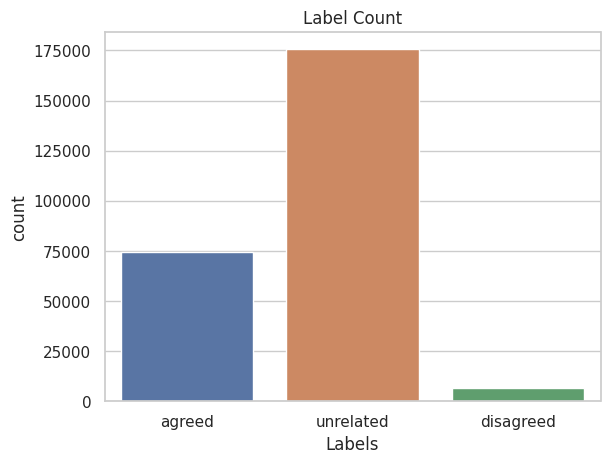

In [18]:
sns.countplot(x=df['label'])
plt.title("Label Count")
plt.xlabel("Labels")

In [19]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 21.7 MB/s eta 0:00:00


In [20]:
import nlpaug.augmenter.word as naw
syn_aug = naw.SynonymAug(aug_p=0.3, aug_max=1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
disagreed_train = train[train.label=='disagreed']
curr = []
for i, s in enumerate(disagreed_train.iloc[:, 0]):
    l = []
    mod_sentence = syn_aug.augment(s, n=1)[0]
    if mod_sentence != disagreed_train.iloc[i, 0]:
        l.append(mod_sentence)
        l.append(disagreed_train.iloc[i, 1])
        l.append(disagreed_train.iloc[i, 2])
        curr.append(l)


for i, s in enumerate(disagreed_train.iloc[:, 0]):
    l = []
    mod_sentence1 = syn_aug.augment(s, n=1)[0]
    mod_sentence2 = syn_aug.augment(disagreed_train.iloc[i, 1], n=1)[0]
    if mod_sentence1 != disagreed_train.iloc[i, 0] and mod_sentence2 != disagreed_train.iloc[i, 1]:
        l.append(mod_sentence1)
        l.append(mod_sentence2)
        l.append(disagreed_train.iloc[i, 2])
        curr.append(l)

for i, s in enumerate(disagreed_train.iloc[:, 1]):
    l = []
    mod_sentence = syn_aug.augment(s, n=1)[0]
    if mod_sentence != disagreed_train.iloc[i, 1]:
        l.append(disagreed_train.iloc[i, 0])
        l.append(mod_sentence)
        l.append(disagreed_train.iloc[i, 2])
        curr.append(l)


In [23]:
len(curr), len(disagreed_train)

(16090, 6606)

In [24]:
syn_aug = naw.SynonymAug(aug_p=0.3, aug_max=3)

In [25]:
for i, s in enumerate(disagreed_train.iloc[:, 0]):
    l = []
    mod_sentence = syn_aug.augment(s, n=1)[0]
    if mod_sentence != disagreed_train.iloc[i, 0]:
        l.append(mod_sentence)
        l.append(disagreed_train.iloc[i, 1])
        l.append(disagreed_train.iloc[i, 2])
        curr.append(l)

for i, s in enumerate(disagreed_train.iloc[:, 0]):
    l = []
    mod_sentence1 = syn_aug.augment(s, n=1)[0]
    mod_sentence2 = syn_aug.augment(disagreed_train.iloc[i, 1], n=1)[0]
    if mod_sentence1 != disagreed_train.iloc[i, 0] and mod_sentence2 != disagreed_train.iloc[i, 1]:
        l.append(mod_sentence1)
        l.append(mod_sentence2)
        l.append(disagreed_train.iloc[i, 2])
        curr.append(l)

for i, s in enumerate(disagreed_train.iloc[:, 1]):
    l = []
    mod_sentence = syn_aug.augment(s, n=1)[0]
    if mod_sentence != disagreed_train.iloc[i, 1]:
        l.append(disagreed_train.iloc[i, 0])
        l.append(mod_sentence)
        l.append(disagreed_train.iloc[i, 2])
        curr.append(l)

In [26]:
len(curr)

35540

In [27]:
curr = np.array(curr)

In [28]:
AGREED_COUNT = train['label'].value_counts()[1]
unrelated_train = train[train.label=='unrelated']
agreed_train = train[train.label=='agreed']
disagreed_train = train[train.label=='disagreed']
additional_data = pd.DataFrame(data=curr, columns=['title1_en', 'title2_en', 'label'])
train = pd.concat([unrelated_train, agreed_train, disagreed_train, additional_data], axis=0)

In [29]:
train = train.sample(frac=1, random_state=47)

In [30]:
train.columns

Index(['title1_en', 'title2_en', 'label'], dtype='object')

Text(0.5, 0, 'Labels')

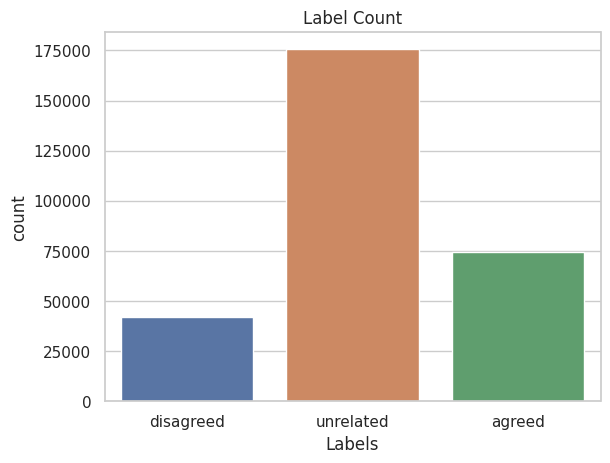

In [31]:
sns.countplot(x=train['label'])
plt.title("Label Count")
plt.xlabel("Labels")

In [32]:
train['label'] = train['label'].map({'unrelated':0, 'agreed':1, 'disagreed':2}).astype(np.uint8)
train.label.unique()

array([2, 0, 1], dtype=uint8)

In [33]:
train['label'].value_counts()

0    175598
1     74238
2     42146
Name: label, dtype: int64

In [34]:
train.head()

,title1_en,title2_en,label
1383,It turns out Ma Huateng ' second daughter Ma M...,Ma Huateng tells the rumour that Wang Zhong pu...,2
117507,Netflix fly-by-plane fly-in-the-mud-moths-Urum...,- Texas Airplanes for Moths? - MLA: Rumors.,0
156419,Women on the subway do not give a seat to the ...,"A man gives a seat to a pregnant woman, and a ...",0
239056,"A magic grass, cure uncle's diabetes mellitus!",You know what? Here comes Diabetic Friendship....,1
192827,The photographer adventured to explore Fan Che...,New traffic rules are to be implemented from N...,0


In [35]:
train['label'].value_counts()

0    175598
1     74238
2     42146
Name: label, dtype: int64

In [36]:
train.to_csv('augmented_train.csv')